In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv

# Chromatogramme de l'échantillon 1

In [2]:
file = "Chromatos/tic_front_ech_1_hydro.csv"
ech_1_hydro_df = pd.read_csv(file, skiprows=1)
ech_1_hydro_df

,Start of data points,Area
0,1.99480,6938978.0
1,1.99862,6158481.0
2,2.00242,5366951.0
3,2.00623,4755161.0
4,2.01005,4345257.0
...,...,...
8344,33.80745,427167.0
8345,33.81127,428047.0
8346,33.81507,427393.0
8347,33.81888,427451.0


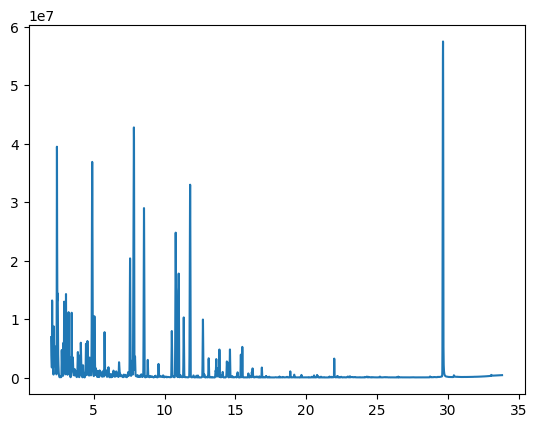

In [3]:
plt.plot(ech_1_hydro_df['Start of data points'], ech_1_hydro_df['Area'])

Note : J'ai récupéré tous les chromatogrammes normalement! Essayer de voir comment les séparer.

# Ensemble des chromatogrammes

J'ai dû faire en deux fois à voir si ça marche ou pas...
Plus faire à la main...

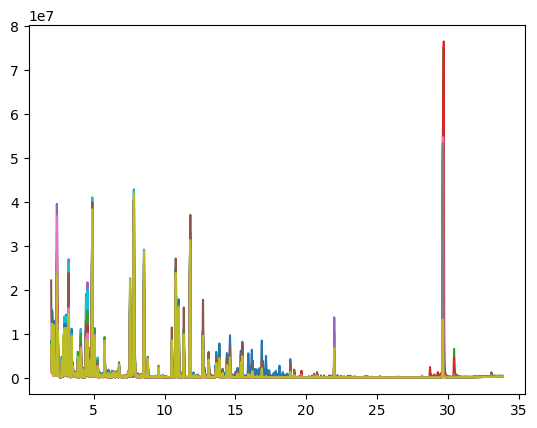

In [38]:
for i in range(1, 10) :
    file = f"Chromatos/ech_0{i}_hydro.csv"
    df = pd.read_csv(file)
    plt.plot(df['Retention time'], df['Abundance'])

for i in range(10, 20) :
    file = f"Chromatos/ech_{i}_hydro.csv"
    df = pd.read_csv(file)
    plt.plot(df['Retention time'], df['Abundance'])

,Retention time,Abundance
0,1.995,7582671
1,1.999,6752057
2,2.002,5934168
3,2.006,5230944
4,2.010,4667489
